In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


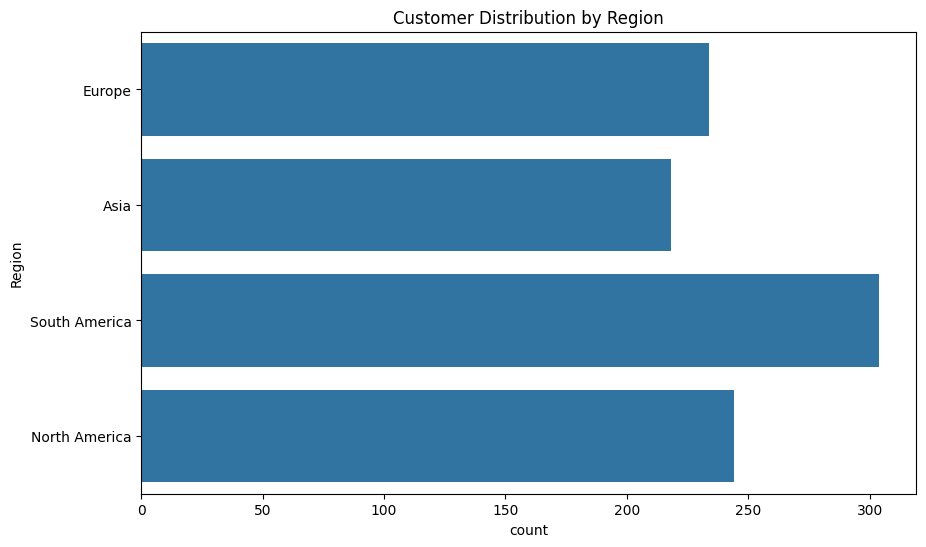

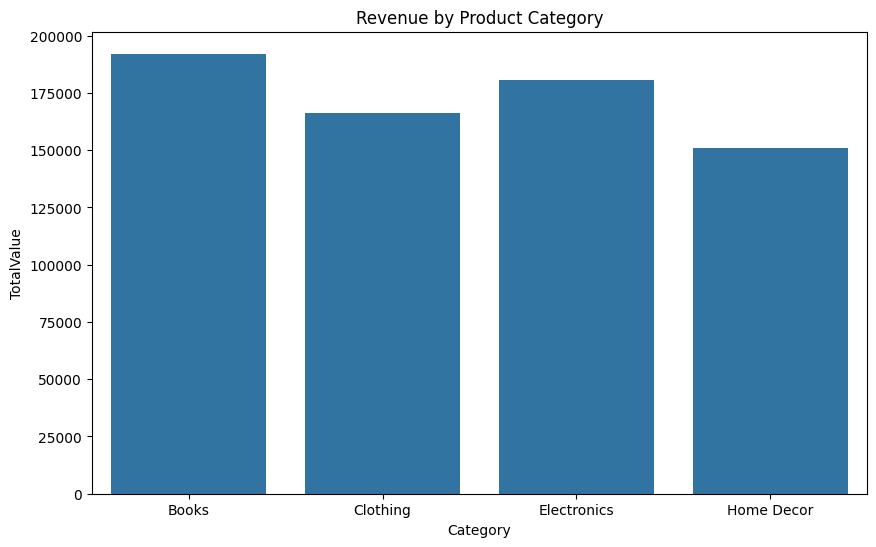

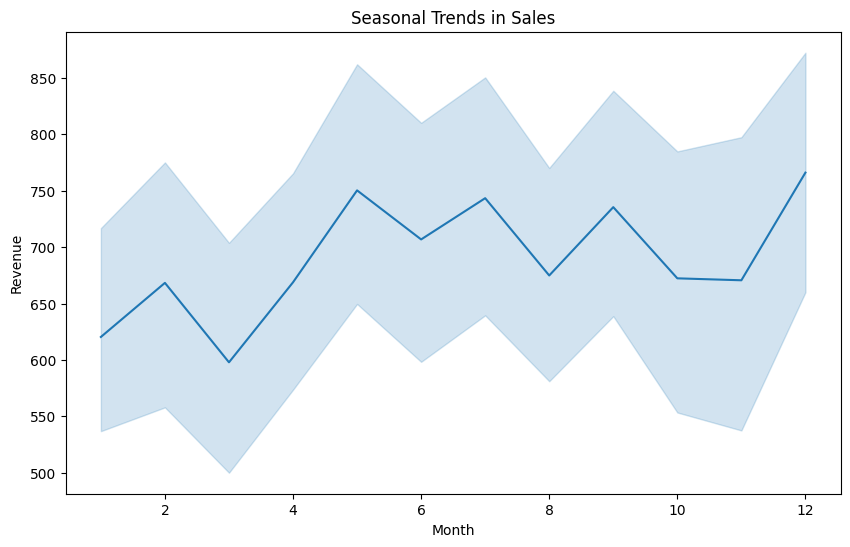

Davies-Bouldin Index: 1.12180191226693


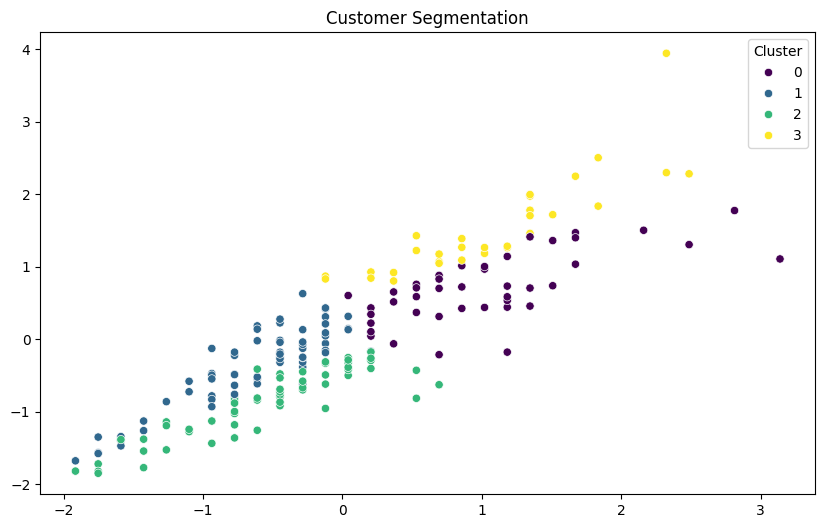

EDA, Lookalike, and Clustering tasks completed successfully.


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Task 1: EDA and Business Insights
# Loading datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merging datasets
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, products, on='ProductID')

# EDA
# Checking data info
print(data.info())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data['Region'])
plt.title('Customer Distribution by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='TotalValue', data=data.groupby('Category').sum().reset_index())
plt.title('Revenue by Product Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=pd.to_datetime(data['TransactionDate']).dt.month, y='TotalValue', data=data)
plt.title('Seasonal Trends in Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Task 2: Lookalike Model
# Aggregating customer features
if 'Price' not in data.columns:
    data['Price'] = data['TotalValue'] / data['Quantity']

customer_features = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()

# Standardizing data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Calculating similarity
similarity_matrix = cosine_similarity(scaled_features)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_features['CustomerID'], columns=customer_features['CustomerID'])

# Creating Lookalike recommendations
lookalike_dict = {}
for customer in similarity_df.index[:20]:  # First 20 customers
    similar_customers = similarity_df[customer].sort_values(ascending=False).iloc[1:4]
    lookalike_dict[customer] = similar_customers.to_dict()

lookalike_df = pd.DataFrame([{"CustomerID": k, "SimilarCustomers": v} for k, v in lookalike_dict.items()])
lookalike_df.to_csv('VVS_Maheedhara_Karthik_Lookalike.csv', index=False)

# Task 3: Customer Segmentation / Clustering
# Preparing data for clustering
features = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price': 'mean'
}).reset_index()
features_scaled = scaler.fit_transform(features.iloc[:, 1:])

# Applying KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculating Davies-Bouldin Index
db_index = davies_bouldin_score(features_scaled, features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=features['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()

# Saving Clustering Results
features.to_csv('VVS_Maheedhara_Karthik_Clustering.csv', index=False)

print("EDA, Lookalike, and Clustering tasks completed successfully.")
